In [12]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 
import os
import fnmatch
from config import input_datadir, result_datadir
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)

In [18]:
input_datadir

WindowsPath('C:/Users/annam/Desktop/Johanna/CSC411/Comparison-of-Identification-Techniques/Johanna_Opperman/Data/Input_Data')

In [29]:
def extract_data(filename):
    df = pandas.read_csv(input_datadir/filename)
    ydata = df.T1.values - df.T1[0]
    udata = df.Q1.values - df.Q1[0]
    t = numpy.arange(len(df))
    return ydata, udata, t

In [30]:
def ARMAX(filename):
    ydata, udata, t = extract_data(filename)
    ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit()
    y_armax = ARMA_results.predict(0, len(t)-1, udata) + 21
    print(y_armax[0])
    return y_armax

In [90]:
def Results(filename, filename1, filename2):
    y_armax = ARMAX(filename)
    y_armax1 = ARMAX(filename1)
    y_armax2 = ARMAX(filename2)
    
    df = pandas.read_csv(input_datadir/filename)
    df1 = pandas.read_csv(input_datadir/filename1)
    df2 = pandas.read_csv(input_datadir/filename2)
    
    fig, ax = plt.subplots(3,1, figsize=(14, 12))
    ax[0].set_ylabel('Process Output')
    ax[1].set_ylabel('Process Output')
    ax[2].set_ylabel('Process Output')
    ax[2].set_xlabel('Time (s)')
    
    ax[0].plot(df.Time, df.T1, color='k', label = 'Step observation')
    ax[0].plot(df.Time, y_armax, '--', color='k', label = 'ARMAX prediction')
    
    ax[1].plot(df1.Time, df1.T1, color='k', label = 'Rectangular pulse observation')
    ax[1].plot(df1.Time, y_armax1, '--', color='k', label = 'ARMAX prediction')
    
    ax[2].plot(df2.Time, df2.T1, color='k', label = 'Doublet observation')
    ax[2].plot(df2.Time, y_armax2, '--', color='k', label = 'ARMAX prediction')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    path = 'C:/Users/annam/Desktop/Johanna/CSC411/Comparison-of-Identification-Techniques/Johanna_Opperman/Report/IMAGES'
    fig.savefig(os.path.join(path,'ARMAX.pdf'), bbox_inches='tight')

C:\Users\annam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


21.708223645854144
22.58664067353002
35.40510733437676


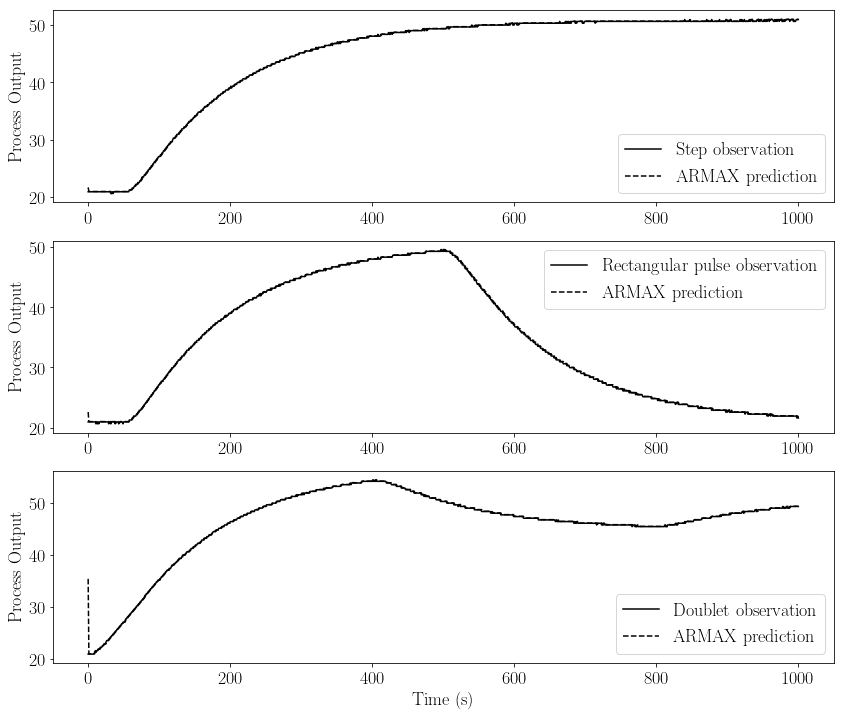

In [91]:
Results('Step1.csv', 'Rpi1_Q1_only.csv', 'Doublet1_Q1_only.csv')

In [ ]:
df = pandas.read_csv("Step1.csv")
udata = df.Q1 - df.Q1[0]
ydata = df.T1 - df.T1[0]
t = numpy.arange(len(df)-1)
ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit()
ARMA_results.summary()

In [66]:
cst, q1, ar1, ar2, ma = ARMA_results.params

NameError: name 'ARMA_results' is not defined

### Trying to understand how .predict works:

In [18]:
ARMA_results.params

const       0.708224
Q1          0.000003
ar.L1.T1    0.600359
ar.L2.T1    0.399641
ma.L1.T1    0.092443
dtype: float64

In [20]:
# Step response
df = pandas.read_csv('Step1.csv')

t = numpy.arange(len(df)-1)
us = udata #- udata[0]  # deviation variables
y_arx = []
y_t = y_1 = y_2 = ϵ_t = ϵ_1 = 0
for i, ti in enumerate(t):
    u_1 = 0 if i < 1 else us[i-1]
    T_t = (1/3)*(y_t + y_1 + y_2)
    ϵ_1, ϵ_t = ϵ_t, y_t - T_t
    y_2, y_1 = y_1, y_t
    y_t = ar1*y_1 + ar2*y_2 + ma*ϵ_1 + ϵ_t + q1*u_1
    y_arx.append(y_t)

y_arxfit = numpy.array(y_arx) + 21  #  switch back from deviation variables


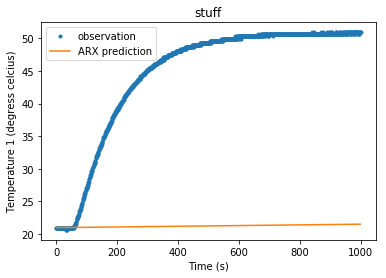

In [21]:

plt.plot(df.Time, df.T1, '.', label = 'observation')
plt.plot(t, y_arxfit, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title('stuff')
plt.legend()
plt.show()

In [23]:
ARMA_results.predict??